In [1382]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [1383]:
path = "E:/Hackathon/SegmindAIChallenge/dataset/"
df_train = pd.read_csv(path + 'TRAIN.csv')
df_test = pd.read_csv(path + 'TEST.csv')


C:\Users\basto\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [1384]:
df_test.shape

(305163, 7)

In [1385]:
df_train.drop('Customers',axis = 1, inplace = True)

## Reduce 0's from trainset

In [1386]:
# Reduce huge number of 0's in df_train

df_train['Sales'].value_counts()

0        122098
5674        163
5697        142
5723        142
6214        141
          ...  
23005         1
18521         1
16472         1
18071         1
1118          1
Name: Sales, Length: 20727, dtype: int64

In [1387]:
df_train = df_train.sample(frac = 1)

In [1388]:
filterzeros = df_train[df_train['Sales'] == 0][:10]

In [1389]:
filterzeros['Sales'].value_counts()

0    10
Name: Sales, dtype: int64

In [1390]:
df_train = df_train[df_train['Sales']!=0]

In [1391]:
xdf = pd.concat([df_train, filterzeros])

In [1392]:
xdf['Sales'].value_counts()

5674     163
5697     142
5723     142
6214     141
5818     141
        ... 
21425      1
19378      1
19060      1
24285      1
19764      1
Name: Sales, Length: 20727, dtype: int64

In [1393]:
xdf = xdf.sample(frac = 1)
xdf = xdf.iloc[:305163]

In [1394]:
xdf['Sales'].value_counts()

5674     87
6376     80
5492     79
5558     78
5665     77
         ..
14280     1
24882     1
18474     1
20521     1
22227     1
Name: Sales, Length: 18442, dtype: int64

In [1395]:
xdf.shape

(305163, 8)

In [1396]:
df_test.shape

(305163, 7)

In [1397]:
df_test.head(3)

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,767,1,2013-04-01,0,0,b,1
1,1111,6,2013-03-16,1,0,0,0
2,45,4,2013-08-01,1,1,0,1


# Observe Dataset

In [1398]:
xdf.head()

,Store,DayOfWeek,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday
181395,766,4,2015-02-19,6575,1,1,0,1
611802,453,1,2013-12-30,10182,1,0,0,1
222538,654,2,2015-01-13,8481,1,1,0,0
525588,94,1,2014-03-17,10472,1,1,0,0
234494,345,5,2015-01-02,4016,1,0,0,1


In [1399]:
# Extract year, month and day from 'Date'

In [1400]:
xdf['Date']

181395    2015-02-19
611802    2013-12-30
222538    2015-01-13
525588    2014-03-17
234494    2015-01-02
             ...    
356034    2014-08-26
391504    2014-07-19
194551    2015-02-07
634619    2013-12-10
528143    2014-03-15
Name: Date, Length: 305163, dtype: object

In [1401]:
xdf['Date'] = pd.to_datetime(xdf['Date'])
df_test['Date'] = pd.to_datetime(df_test['Date'])

In [1402]:
xdf['Date']

181395   2015-02-19
611802   2013-12-30
222538   2015-01-13
525588   2014-03-17
234494   2015-01-02
            ...    
356034   2014-08-26
391504   2014-07-19
194551   2015-02-07
634619   2013-12-10
528143   2014-03-15
Name: Date, Length: 305163, dtype: datetime64[ns]

In [1403]:
xdf['Year'] = xdf['Date'].dt.year
xdf['Month'] = xdf['Date'].dt.month
xdf['Day'] = xdf['Date'].dt.day


df_test['Year'] = df_test['Date'].dt.year
df_test['Month'] = df_test['Date'].dt.month
df_test['Day'] = df_test['Date'].dt.day


In [1404]:
xdf.drop('Date', axis = 1, inplace = True)
df_test.drop('Date', axis = 1, inplace = True)

In [1405]:
xdf.shape

(305163, 10)

In [1406]:
xdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305163 entries, 181395 to 528143
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          305163 non-null  int64 
 1   DayOfWeek      305163 non-null  int64 
 2   Sales          305163 non-null  int64 
 3   Open           305163 non-null  int64 
 4   Promo          305163 non-null  int64 
 5   StateHoliday   305163 non-null  object
 6   SchoolHoliday  305163 non-null  int64 
 7   Year           305163 non-null  int64 
 8   Month          305163 non-null  int64 
 9   Day            305163 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 25.6+ MB


In [1407]:
xdf['StateHoliday'].values

array(['0', '0', '0', ..., '0', '0', 0], dtype=object)

In [1408]:
xdf['StateHoliday'].value_counts()

0    246760
0     58078
a       245
b        47
c        33
Name: StateHoliday, dtype: int64

In [1409]:
df_test['StateHoliday'].value_counts()

0    297219
a      5714
b      2230
Name: StateHoliday, dtype: int64

In [1410]:
xdf['StateHoliday'] = xdf['StateHoliday'].replace({'0':'0','a':'1','b':'1','c':'1'})

In [1411]:
xdf['StateHoliday'].value_counts()

0    246760
0     58078
1       325
Name: StateHoliday, dtype: int64

In [1412]:
df_test['StateHoliday'] = df_test['StateHoliday'].replace({'a':'1','b':'1'})

In [1413]:
xdf['StateHoliday'] = pd.to_numeric(xdf['StateHoliday'])

In [1414]:
df_test['StateHoliday'] = pd.to_numeric(df_test['StateHoliday'])

In [1415]:
# let's recheck 

xdf['StateHoliday'].value_counts()

0    304838
1       325
Name: StateHoliday, dtype: int64

In [1416]:
df_test['StateHoliday'].value_counts()

0    297219
1      7944
Name: StateHoliday, dtype: int64

This need to be converted to Numeric and fixed.

In [1417]:
# school holiday

xdf['SchoolHoliday'].value_counts()

0    248806
1     56357
Name: SchoolHoliday, dtype: int64

<AxesSubplot:>

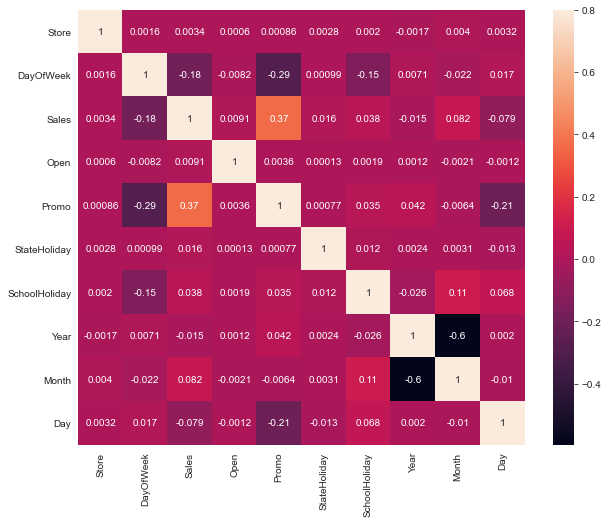

In [1418]:
corr = xdf.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, vmax = .8, annot = True)

# Exploratory Data Analaysis

In [1419]:
xdf['Open'].value_counts()

1    305158
0         5
Name: Open, dtype: int64

## Univariate (Target Attribute)

In [1420]:
xdf['Sales'].value_counts()

5674     87
6376     80
5492     79
5558     78
5665     77
         ..
14280     1
24882     1
18474     1
20521     1
22227     1
Name: Sales, Length: 18442, dtype: int64

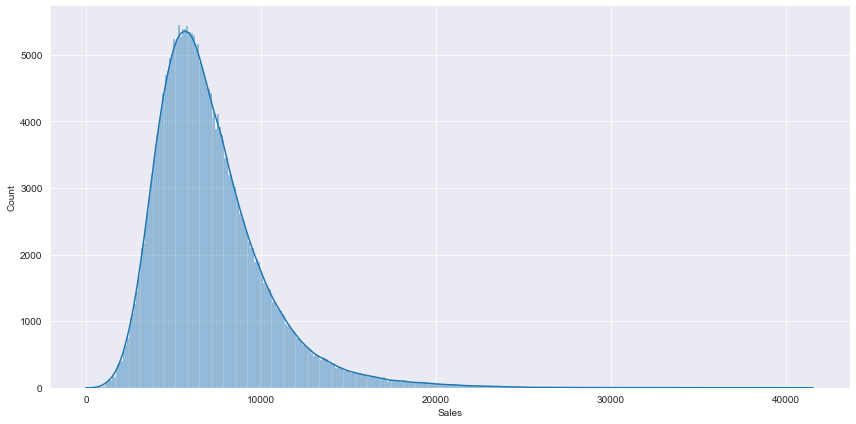

In [1421]:
## Lets check its distribution

sns.displot(x = 'Sales', data = xdf, aspect = 2, height = 6, kde = True);

In [1422]:
# Skew and kurt
print("Skewness: %f" % xdf['Sales'].skew())
print("Kurtosis: %f" % xdf['Sales'].kurt())

Skewness: 1.587685
Kurtosis: 4.754368


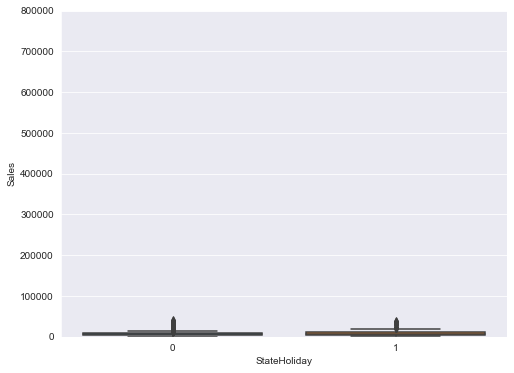

In [1423]:
# Let's plot how Sales relates to some of the features in the dataset

data = pd.concat([xdf['Sales'], xdf['StateHoliday']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=xdf['StateHoliday'], y="Sales", data=data)
fig.axis(ymin=0, ymax=800000);

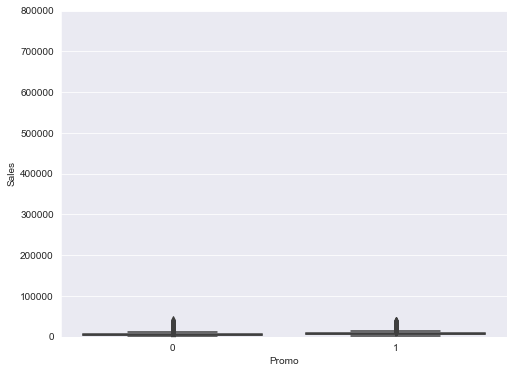

In [1424]:
# Let's plot how Sales relates to some of the features in the dataset

data = pd.concat([xdf['Sales'], xdf['Promo']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=xdf['Promo'], y="Sales", data=data)
fig.axis(ymin=0, ymax=800000);

In [1425]:
xdf['Sales'].value_counts()

5674     87
6376     80
5492     79
5558     78
5665     77
         ..
14280     1
24882     1
18474     1
20521     1
22227     1
Name: Sales, Length: 18442, dtype: int64

# Feature Engineering

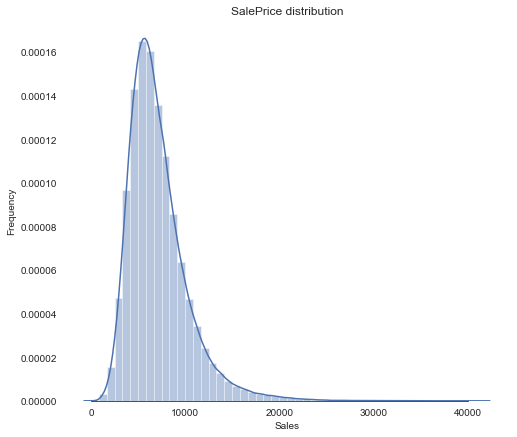

In [1426]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(xdf['Sales'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Sales")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

The Sales is skewed to the right. This is a problem because most ML models don't do well with non-normally distributed data. We can apply a log(1+x) transform to fix the skew.

In [1427]:
from scipy.stats import skew, norm

In [1428]:
xdf['Sales'] = np.log1p(xdf['Sales'])


 mu = 8.78 and sigma = 0.42



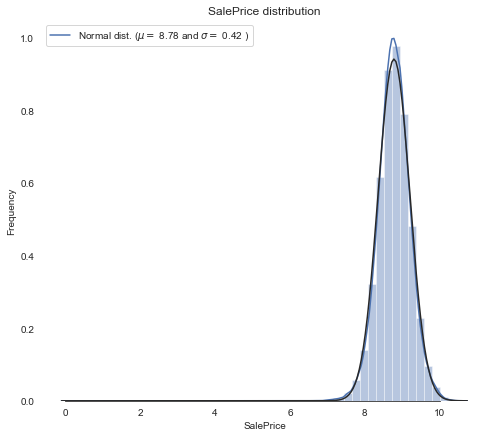

In [1429]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(xdf['Sales'] , fit=norm, color="b");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(xdf['Sales'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)

plt.show()

In [1430]:
xdf.shape

(305163, 10)

## Correlation

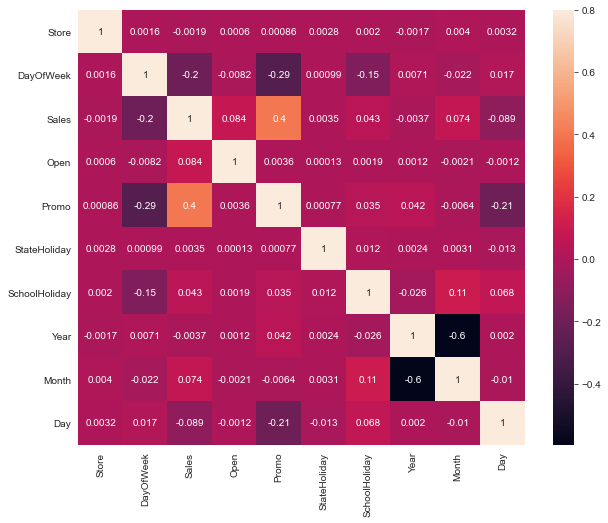

In [1431]:
# Let's check the correlation of the feature with target

corr = xdf.corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr, vmax = .8, annot = True);

In [1432]:
xdf.drop(['DayOfWeek'], axis = 1, inplace = True)

In [1464]:
df_test.drop(['DayOfWeek'], axis = 1, inplace = True)

In [1433]:
# split featurs and labels

train_labels = xdf['Sales'].reset_index(drop = True)
train_features = xdf.drop(['Sales'], axis =1)
test_features = df_test

# combine train and test features in order to apply the features transformation pipeline to the entire dataset
all_features = pd.concat([train_features, test_features]).reset_index(drop = True)
all_features.shape

(610326, 9)

#### Fix skewed features

In [1434]:
# fetch all numeric features

numeric_dtypes = ['int16','int32','int64','float16','float32','float64']

numeric = []

for i in all_features.columns:
    if all_features[i].dtype in numeric_dtypes:
        numeric.append(i)

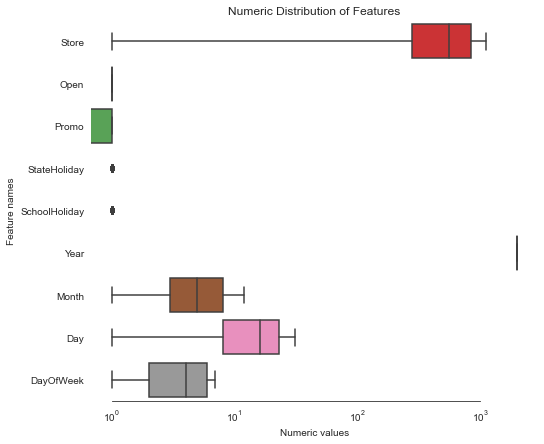

In [1435]:
# Create box plots for all numeric features
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=all_features[numeric] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [1436]:
# Find skewed numerical features
skew_features = all_features[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(10)

There are 3 numerical features with Skew > 0.5 :


StateHoliday     8.415620
SchoolHoliday    1.586879
Year             0.823492
Promo            0.344250
Month            0.286531
Day              0.009133
Store           -0.001005
Open            -3.019057
DayOfWeek             NaN
dtype: float64

We use the scipy function boxcox1p which computes the Box-Cox transformation. The goal is to find a simple transformation that lets us normalize data.

# Dataset Preparation

In [1437]:
# Splitting the dataset

X = xdf.drop(['Sales'], axis =1)
y = xdf['Sales']

In [1438]:
from sklearn.model_selection import train_test_split

In [1439]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [1440]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [1441]:
(X_train.shape, X_test.shape)

((244130, 8), (61033, 8))

In [1442]:
X_test

,Store,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
641269,930,1,1,0,0,2013,12,4
341141,49,1,0,0,1,2014,9,10
498280,661,1,0,0,0,2014,4,11
655584,750,1,1,0,0,2013,11,21
62093,769,1,0,0,0,2015,6,6
...,...,...,...,...,...,...,...,...
569048,69,1,1,0,0,2014,2,6
437101,807,1,1,0,0,2014,6,5
28625,751,1,0,0,1,2015,7,6
34579,15,1,1,0,0,2015,6,30


### Preprocessing

In [1443]:
from sklearn.preprocessing import StandardScaler

In [1444]:
ct = ColumnTransformer([
                ('scaler', StandardScaler(),['Store','Month','Year','Day'])
], remainder = 'passthrough')

# Modeling and Evaluation Metrics

In [1445]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

## Linear Regression

In [1446]:
from sklearn.linear_model import LinearRegression

In [1447]:
lr = LinearRegression()
lr_pipe = Pipeline([
            ('column-transformer', ct),
            ('LinearRegression', lr)
])

In [1448]:
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('column-transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Store', 'Month', 'Year',
                                                   'Day'])])),
                ('LinearRegression', LinearRegression())])

In [1449]:
lr_pred = lr_pipe.predict(X_test)

In [1450]:
print("R2 Score:", r2_score(y_test, lr_pred))
print("Mean Squarred Error: %.3f" % mean_squared_error(y_test, lr_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, lr_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,lr_pred)))

R2 Score: 0.17791128237450937
Mean Squarred Error: 0.149
RMSE: 0.3855519892058247
Mean Absolute Error : 0.29842164615076244


## GradientBoostingRegressor

In [1451]:
from sklearn.ensemble import GradientBoostingRegressor


In [1452]:
gbr = GradientBoostingRegressor()

In [1453]:
gbr_pipe = Pipeline([
            ('column-transformer', ct),
            ('GradientBoostingRegressor', gbr)
])

In [1454]:
gbr_pipe.fit(X_train, y_train)

Pipeline(steps=[('column-transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Store', 'Month', 'Year',
                                                   'Day'])])),
                ('GradientBoostingRegressor', GradientBoostingRegressor())])

In [1455]:
gbr_pred = gbr_pipe.predict(X_test)

In [1456]:
print("R2 Score:", r2_score(y_test, gbr_pred))
print("Mean Squarred Error:", mean_squared_error(y_test, gbr_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, gbr_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,gbr_pred)))

R2 Score: 0.30711275409798
Mean Squarred Error: 0.12528808627204932
RMSE: 0.3539605716348211
Mean Absolute Error : 0.27542671363602383


## XGBoost

In [1457]:
from xgboost import XGBRegressor

In [1458]:
xgb = XGBRegressor(n_estimators = 100, learning_rate = 0.05)
xgb_pipe = Pipeline([
            ('column-transformer', ct),
            ('XGBRegression', xgb)
])

In [1459]:
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('column-transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Store', 'Month', 'Year',
                                                   'Day'])])),
                ('XGBRegression',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='', learning_rate=0.05,
                              max_delta_step=0, max_depth=6, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=8, num_parallel_tree=1,
                              random_state=0, reg_alpha=0, reg_lambda=1,
         

In [1460]:
xgb_pred = xgb_pipe.predict(X_test)

In [1461]:
print("R2 Score:", r2_score(y_test, xgb_pred))
print("Mean Squarred Error: %.3f " % mean_squared_error(y_test, xgb_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, xgb_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,xgb_pred)))

R2 Score: 0.3389653925369829
Mean Squarred Error: 0.120 
RMSE: 0.34572891451283533
Mean Absolute Error : 0.26899757477187103


In [1465]:
real_test_pred = xgb_pipe.predict(df_test)

In [1466]:
output = pd.DataFrame(columns = ['Index','Sales'])

In [542]:
output['Index'] = df_test.index

In [545]:
output

,Index,Sales
0,0,0.0
1,1,3523.0
2,2,7205.0
3,3,5211.0
4,4,5219.0
...,...,...
305158,305158,7929.0
305159,305159,5246.0
305160,305160,5194.0
305161,305161,4781.0


In [544]:
output['Sales'] = np.floor(np.expm1(xgb_pipe.predict(df_test)))

In [546]:
output.to_csv('output.csv', index = False)

In [547]:
mysub= pd.read_csv('output.csv')

In [548]:
mysub

,Index,Sales
0,0,0.0
1,1,3523.0
2,2,7205.0
3,3,5211.0
4,4,5219.0
...,...,...
305158,305158,7929.0
305159,305159,5246.0
305160,305160,5194.0
305161,305161,4781.0


## 2,321.8847 << Public Score